In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [2]:
df= pd.read_csv("carlazo.csv")  #loading dataset
df.head(4)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000


In [3]:
df.info()                #to get information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.8 KB


In [4]:
df.describe()                #To describe the dataset with mean, std, min, max etc

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


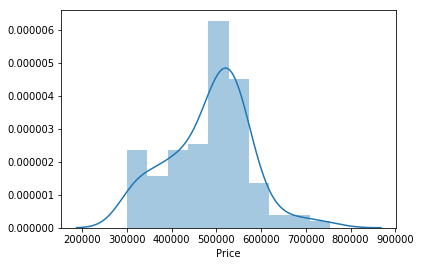

In [5]:
sns.distplot(df.Price ,bins=10)             #distribution plot of price

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


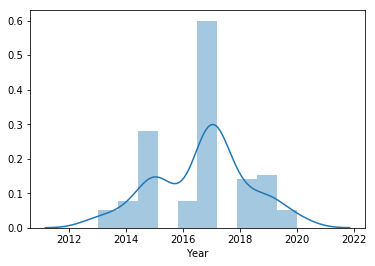

In [6]:
sns.distplot(df.Year ,bins=10)         #distribution plot of price

In [7]:
df["Year"].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

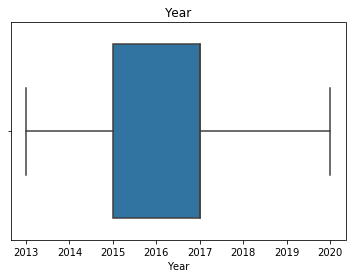

In [8]:
sns.boxplot(x=df['Year'])
plt.title("Year")                  #box plot of year
plt.show()

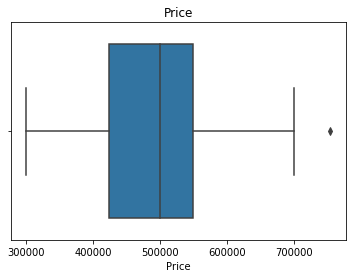

In [9]:
sns.boxplot(df['Price'])
plt.title("Price")                    #box plot of Price
plt.show()

outliers

In [10]:
q1=np.percentile(df['Price'],25, interpolation="midpoint")
q2=np.percentile(df['Price'],50, interpolation="midpoint")
q3=np.percentile(df['Price'],75, interpolation="midpoint")

In [11]:
print(q1)
print(q2)
print(q3)

422500.0
500000.0
550000.0


In [12]:
IQR= q3-q1
IQR

127500.0

In [13]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)

231250.0
741250.0


In [14]:
outlier=[]
for x in df['Price']:
    if (x>upper_limit) or (x<lower_limit) :
        outlier.append(x)

In [15]:
outlier

[755000]

In [16]:
df.drop(df[(df["Price"]> upper_limit)].index, inplace= True)

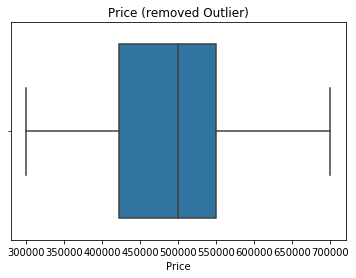

In [17]:
sns.boxplot(df['Price'])
plt.title("Price (removed Outlier)")
plt.show()

corelation

In [18]:
df.corr()

,Year,Price
Year,1.000000,0.776449
Price,0.776449,1.000000


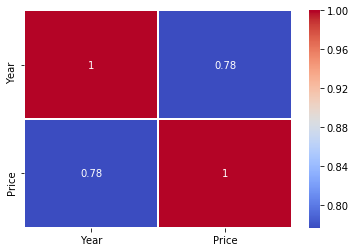

In [19]:
sns.heatmap(df.corr(), cbar=True ,linewidth=0.3,cmap="coolwarm",annot= True)

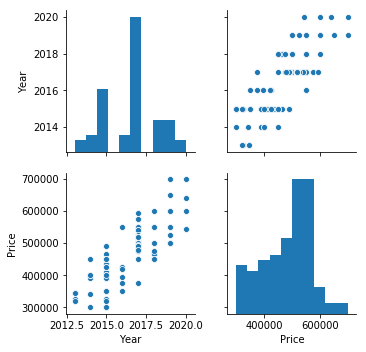

In [20]:
sns.pairplot(df)

In [21]:
df.describe()

,Year,Price
count,111.000000,111.000000
mean,2016.648649,481423.396396
std,1.621720,87874.563371
min,2013.000000,300000.000000
25%,2015.000000,422500.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,700000.000000


modelling

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Price"])
y = df["Price"]
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25,random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()
model= lr.fit(x_train, y_train)
prediction = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print("mean square errorr is : ", mean_squared_error(y_test, prediction))
print("R Square value is : ", r2_score(y_test, prediction))

mean square errorr is :  2718820563.0700393
R Square value is :  0.6727697922780109


Standardization

In [25]:
from sklearn  import preprocessing

In [26]:
x1= preprocessing.scale(df)

In [27]:
x1= pd.DataFrame(x1,columns=["Year","Price"])
x1.head(3)

,Year,Price
0,0.837062,-0.187744
1,1.456488,2.498651
2,0.837062,-0.187744


In [28]:
x1.describe()

,Year,Price
count,1.110000e+02,1.110000e+02
mean,-6.862178e-14,1.740350e-16
std,1.004535e+00,1.004535e+00
min,-2.260067e+00,-2.073936e+00
25%,-1.021216e+00,-6.735809e-01
50%,2.176361e-01,2.123578e-01
75%,2.176361e-01,7.839312e-01
max,2.075914e+00,2.498651e+00


modelling after standardization (linear regression)

In [29]:
x = x1.drop(columns=["Price"])
y = x1["Price"]
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25,random_state=42)


In [30]:
lr=  LinearRegression()
model= lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print("mean square errorr is : ", mean_squared_error(y_test, predictions))
print("R Square value is : ", r2_score(y_test, predictions))

mean square errorr is :  0.3552912232999024
R Square value is :  0.6727697922779785


lasso regression

In [32]:
from sklearn.linear_model import Lasso

In [37]:
x = x1.drop(columns=["Price"])
y = x1["Price"]
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25,random_state=42)


In [38]:
lasso= Lasso(alpha=1)

In [44]:
model=lasso.fit(x_train, y_train)
score=model.score(x,y)
y_predictor=lasso.predict(x_test)
#print(score)
y_predictor

array([0.06581427, 0.06581427, 0.06581427, 0.06581427, 0.06581427,
       0.06581427, 0.06581427, 0.06581427, 0.06581427, 0.06581427,
       0.06581427, 0.06581427, 0.06581427, 0.06581427, 0.06581427,
       0.06581427, 0.06581427, 0.06581427, 0.06581427, 0.06581427,
       0.06581427, 0.06581427, 0.06581427, 0.06581427, 0.06581427,
       0.06581427, 0.06581427, 0.06581427])

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print("mean square errorr is : ", mean_squared_error(y_test, predictions))
print("R Square value is : ", r2_score(y_test, predictions))

mean square errorr is :  0.3552912232999024
R Square value is :  0.6727697922779785
